<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/credit_data_mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [18]:
pip install Minisom

  Created wheel for Minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=208310cecd9547e2ae5ba71975274135b5971db5259ffda06198fdd75b18f0a6
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built Minisom


In [3]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/estudo-python-git/master/machine-learning/dataset/credit_data.csv')
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [6]:
base.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [5]:
base.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [9]:
base.dropna(inplace=True)

In [10]:
base.loc[base.age < 0, 'age'] = 40.80

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  1997 non-null   int64  
 1   income      1997 non-null   float64
 2   age         1997 non-null   float64
 3   loan        1997 non-null   float64
 4   c#default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


In [40]:
x = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [41]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(x);

In [42]:
x.shape

(1997, 4)

In [43]:
celulas = 5 * np.sqrt(x.shape[0])
celulas

223.43902971504332

In [44]:
from minisom import MiniSom

In [45]:
som = MiniSom(x = 15,
              y = 15,
              input_len = 4,
              random_seed = 0)

som.random_weights_init(x)
som.train_random(data = x, num_iteration = 1000)

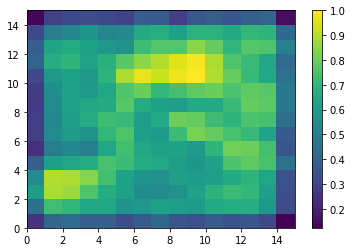

In [46]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar();

In [47]:
markers = ['o', 's']
colors = ['r', 'g']

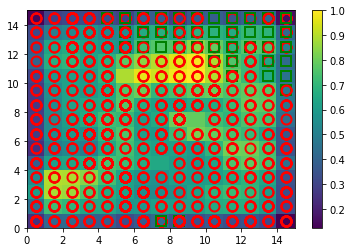

In [48]:
pcolor(som.distance_map().T)
colorbar();
for i, a in enumerate(x):
  w = som.winner(a);
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = colors[y[i]], markeredgewidth = 2)

In [49]:
#buscar clientes que estão no amarelo já que a distância entre vizinhos são altas
mapeamento = som.win_map(x)

In [68]:
suspeitos = np.concatenate((mapeamento[(6,10)], 
                            mapeamento[(7,10)], 
                            mapeamento[(7,11)], 
                            mapeamento[(8,10)], 
                            mapeamento[(8,11)], 
                            mapeamento[(9,10)],
                            mapeamento[(9,11)],
                            mapeamento[(1,2)],
                            mapeamento[(1,3)],
                            mapeamento[(2,2)],
                            mapeamento[(10,10)],
                            mapeamento[(10,11)],
                            mapeamento[(2,3)]),
                            axis = 0)

In [69]:
suspeitos = scaler.inverse_transform(suspeitos)

In [70]:
suspeitos

array([[6.08000000e+02, 4.56520593e+04, 5.36743410e+01, 5.40821213e+03],
       [6.23000000e+02, 4.36940344e+04, 4.95150355e+01, 5.04963551e+03],
       [6.26000000e+02, 4.18166568e+04, 4.89172136e+01, 4.53457597e+03],
       [3.34000000e+02, 4.80182115e+04, 5.02041390e+01, 6.12009002e+03],
       [3.48000000e+02, 4.48974884e+04, 5.13580611e+01, 5.73239903e+03],
       [4.56000000e+02, 4.75483626e+04, 4.78391001e+01, 6.15393656e+03],
       [5.33000000e+02, 4.96045442e+04, 5.19440088e+01, 7.04591920e+03],
       [3.29000000e+02, 3.62424480e+04, 3.94154708e+01, 5.68899485e+03],
       [4.64000000e+02, 3.64305384e+04, 3.82274418e+01, 5.85518559e+03],
       [5.46000000e+02, 4.07948702e+04, 3.80405282e+01, 6.51943706e+03],
       [3.68000000e+02, 4.84632046e+04, 5.05264298e+01, 8.12025809e+03],
       [3.70000000e+02, 5.03104224e+04, 5.30386969e+01, 8.36171910e+03],
       [3.78000000e+02, 4.63281719e+04, 5.68408306e+01, 7.87967621e+03],
       [1.70000000e+01, 4.35486547e+04, 3.95745304e

In [71]:
classe = []

for i in range(len(base)):
  for j in range(len(suspeitos)):
    if base.iloc[i, 0] == int(round(suspeitos[j, 0])):
      classe.append(base.iloc[i, 4]);

classe = np.asarray(classe)
classe

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [72]:
suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final

array([[6.08000000e+02, 4.56520593e+04, 5.36743410e+01, 5.40821213e+03,
        0.00000000e+00],
       [6.23000000e+02, 4.36940344e+04, 4.95150355e+01, 5.04963551e+03,
        0.00000000e+00],
       [6.26000000e+02, 4.18166568e+04, 4.89172136e+01, 4.53457597e+03,
        0.00000000e+00],
       [3.34000000e+02, 4.80182115e+04, 5.02041390e+01, 6.12009002e+03,
        0.00000000e+00],
       [3.48000000e+02, 4.48974884e+04, 5.13580611e+01, 5.73239903e+03,
        0.00000000e+00],
       [4.56000000e+02, 4.75483626e+04, 4.78391001e+01, 6.15393656e+03,
        0.00000000e+00],
       [5.33000000e+02, 4.96045442e+04, 5.19440088e+01, 7.04591920e+03,
        0.00000000e+00],
       [3.29000000e+02, 3.62424480e+04, 3.94154708e+01, 5.68899485e+03,
        1.00000000e+00],
       [4.64000000e+02, 3.64305384e+04, 3.82274418e+01, 5.85518559e+03,
        0.00000000e+00],
       [5.46000000e+02, 4.07948702e+04, 3.80405282e+01, 6.51943706e+03,
        0.00000000e+00],
       [3.68000000e+02, 4.8463

In [73]:
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]

In [75]:
suspeitos_final = pd.DataFrame(data=suspeitos_final, columns=['#clientid', 'income', 'age', 'loan', 'suspeito'])
suspeitos_final.head()

,#clientid,income,age,loan,suspeito
0,608.0,45652.059272,53.674341,5408.212129,0.0
1,242.0,51000.422442,27.802998,778.732696,0.0
2,363.0,47316.701377,27.064198,1940.674044,0.0
3,467.0,46195.777173,32.413599,927.067594,0.0
4,534.0,48433.373489,28.531997,789.633361,0.0


In [97]:
base.iloc[604, 0:5]

i#clientid      608.000000
income        45652.059272
age              53.674341
loan           5408.212129
c#default         0.000000
Name: 607, dtype: float64